In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [6]:
def import_csv_with_year(file_path, year=None):
    # Read the data without converting the first column to a datetime format
    data = pd.read_csv(file_path)

    # Replace all "24:00:00" with "00:00:00" in the first column
    data[data.columns[0]] = data[data.columns[0]].str.replace(' 24:', ' 00:').str.strip()

    # Convert the first column to datetime
    data[data.columns[0]] = pd.to_datetime(data[data.columns[0]], format='%m/%d %H:%M:%S')

    # If no year is specified, use the current year
    if year is None:
        year = datetime.now().year

    # Change the year of the datetime index to the specified year
    data[data.columns[0]] = data[data.columns[0]].apply(lambda dt: dt.replace(year=year))

    # Add 1 day to the dates that had "24:00:00"
    mask = data[data.columns[0]].dt.strftime('%H:%M:%S') == '00:00:00'
    data.loc[mask, data.columns[0]] = data.loc[mask, data.columns[0]] + pd.DateOffset(days=1)

    # Set the first column as the index
    data.set_index(data.columns[0], inplace=True)
    
    return data


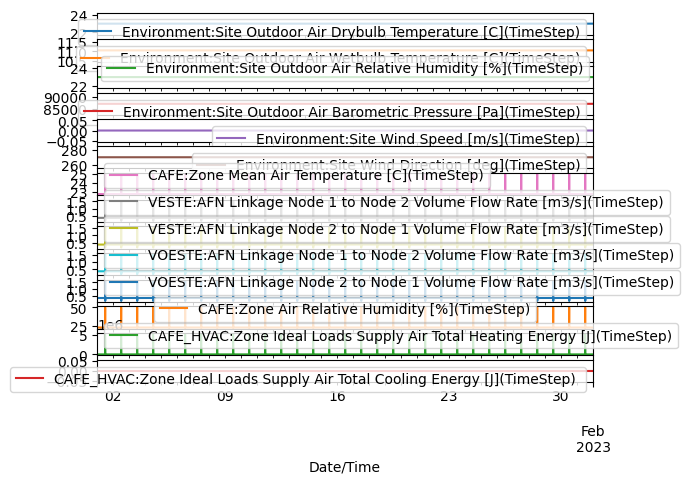

In [7]:
data = import_csv_with_year("../idf/evap_one_zone/one_zone.csv")
data.plot(subplots=True,figsize=());